In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

# Reading Data


In [2]:
df_2021 = pd.read_csv('data/2021.csv')
df_2021.dropna(inplace=True)
# df_2021.tail(20)

df_2020 = pd.read_csv('data/2020.csv')
df_2020.dropna(inplace=True)
# df_2020.tail(20)

### Setting up data for models & testing

In [3]:
# 2021
ploughed_2021 = df_2021.loc[df_2021['Treatment'].str.startswith('PH', na=False)]
ploughed_2021 = ploughed_2021.append(df_2021.loc[df_2021['Treatment'].str.startswith('PL', na=False)])

tilled_2021 = df_2021.loc[df_2021['Treatment'].str.startswith('MH', na=False)]
tilled_2021 = tilled_2021.append(df_2021.loc[df_2021['Treatment'].str.startswith('ML', na=False)])

# 2020
ploughed_2020 = df_2020.loc[df_2020['Treatment'].str.startswith('PH', na=False)]
ploughed_2020 = ploughed_2020.append(df_2020.loc[df_2020['Treatment'].str.startswith('PL', na=False)])

tilled_2020 = df_2020.loc[df_2020['Treatment'].str.startswith('MH', na=False)]
tilled_2020 = tilled_2020.append(df_2020.loc[df_2020['Treatment'].str.startswith('ML', na=False)])

In [4]:
# Setting targets and removing them from dataframe
y = ploughed_2021['Combine Yield (t/ac)']
del ploughed_2021['Combine Yield (t/ac)']

emergenceY = ploughed_2021['Emergence']
del ploughed_2021['Emergence']

# Unused cols
del ploughed_2021['Plot']
del ploughed_2021['Treatment']

# Features
X = ploughed_2021

In [5]:
# Splitting data for training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train_emergence, X_test_emergence, y_train_emergence, y_test_emergence = train_test_split(X, emergenceY, test_size=0.33, random_state=42) # Emergence

## Linear Regression Model

In [6]:
# Linear Regression Model
reg = LinearRegression().fit(X_train, y_train)
reg.score(X, y) # score

-1.7463856027249989

In [7]:
# Linear Regression Model
reg = LinearRegression().fit(X_train_emergence, y_train_emergence)
reg.score(X, emergenceY) # score

-0.08461251131985659

In [8]:
# evaluate the model
yhat = reg.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 4.175


In [9]:
# reg.predict(np.array([[17.7, 31.9, 29.4]]))

## SVR Model

In [10]:
# SVR Model
svr = SVR().fit(X_train, y_train)
svr.score(X, y) # score

0.1316599445226425

In [11]:
# SVR Model
svr = SVR().fit(X_train_emergence, y_train_emergence)
svr.score(X, emergenceY) # score

0.04126098447131632

In [12]:
# svr.predict(np.array([[17.7, 31.9, 29.4]]))

In [13]:
# Starting point -> improved models
# target = emergence date / emergence count

# Feature Selection

In [14]:
X = df_2021

sfs_forward = SFS(reg, k_features=5, forward=True, floating=False, scoring='accuracy', cv=5)

# Try the sfs_forward model on the 
sfs_forward = sfs_forward.fit(X, y, custom_feature_names=X.columns)

fig1 = plot_sfs(sfs_forward.get_metric_dict(), ylabel='Accuracy')

plt.ylim([0.75, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()
print(sfs_forward.k_feature_names_)

ValueError: Found input variables with inconsistent numbers of samples: [40, 34]

In [ ]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k=12)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 0.303927
Feature 1: 0.532768
Feature 2: 1.287597
Feature 3: 0.000412
Feature 4: 0.203775
Feature 5: 0.744881
Feature 6: 2.465215
Feature 7: 4.668294
Feature 8: 3.438737
Feature 9: 6.880368
Feature 10: 6.585583
Feature 11: 1.897739
Feature 12: 1.508275
Feature 13: 0.060816
Feature 14: 0.016039
Feature 15: 2.405919
Feature 16: 2.156557
Feature 17: 1.518389
Feature 18: 1.409752
Feature 19: 0.071443
Feature 20: 3.914890
Feature 21: 0.218445
Feature 22: 1.121615
Feature 23: 0.076112
Feature 24: 0.813220
Feature 25: 5.333652
Feature 26: 3.170982
Feature 27: 0.033472
Feature 28: 1.319670
Feature 29: 0.387981
Feature 30: 0.064817
Feature 31: 0.069785
Feature 32: 0.038904
Feature 33: 0.018334
Feature 34: 0.016959
Feature 35: 0.136846
Feature 36: 0.000892
Feature 37: 0.024253
Feature 38: 0.411830
Feature 39: 0.052144
Feature 40: 0.002210
Feature 41: 0.243828
Feature 42: 0.030702
Feature 43: 0.628552
Feature 44: 0.323379
Feature 45: 0.090852
Feature 46: 0.353925
Feature 47: 0.705227
Fe

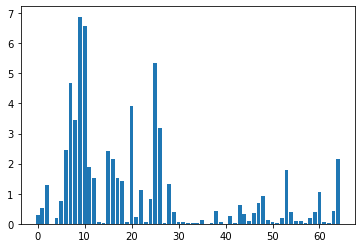

In [ ]:
X_train_fs, X_test_fs, fs = select_features(X_train_emergence, y_train_emergence, X_test_emergence)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [ ]:
reg.fit(X_train_fs, y_train)
# evaluate the model
yhat = reg.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.403


/Users/ciaranflanagan/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
len(fs.feature_names_in_)

65

In [ ]:
cols = fs.get_support(indices=True)
features_df_new = X.iloc[:,cols]
features_df_new

,Chlorophyll 28th May,Chlorophyll 23rd June,Chlorophyll 12th July,Chlorophyll 5th August,LAI 15th June,LAI 12th July,UW Screenings 2.5,UW Screenings 2.25,NT Screenings 2.25,UW Protein @ 15% Moisture,NT Protein @ 15% Moisture,Cone P NT 45cm
1,38.0,43.9,28.0,28.9,0.63,1.90,96.2,2.5,2.9,11.21,12.16,4156.0
2,45.9,45.5,31.5,17.8,0.84,1.84,92.6,4.6,4.4,12.49,13.03,4489.0
3,44.7,46.3,31.7,39.4,0.78,2.96,93.5,4.9,8.4,12.75,13.67,3935.0
4,36.7,48.3,30.0,38.3,0.66,2.37,94.8,3.7,6.6,12.54,12.81,4455.0
5,41.8,41.7,29.8,31.5,0.84,2.67,93.2,5.5,2.8,11.44,11.47,4473.0
6,41.2,40.9,29.7,27.1,0.72,1.89,93.0,5.5,3.8,11.35,11.48,4662.0
7,38.8,45.7,30.8,31.0,0.46,1.19,94.8,3.8,3.5,13.15,12.12,4153.0
9,47.1,47.0,34.7,34.7,0.52,1.04,96.7,2.4,2.6,10.46,10.93,3982.0
10,45.1,44.5,33.5,27.5,0.58,1.19,98.9,1.0,1.1,11.26,10.08,3869.0
11,41.8,38.5,30.8,35.2,0.58,1.73,97.2,1.8,0.2,10.83,10.12,4574.0


### Ploughed, Pressure and Moisture
Building a model based no ploughed, pressure and moisture.

In [31]:
df_2021['ploughed'] = 0
df_2021['tilled'] = 0
df_2021['high pressure'] = 0
df_2021['low pressure'] = 0
df_2021['high moisture'] = 0
df_2021['low moisture'] = 0

for index, row in df_2021.iterrows():
    if row['Treatment'] == 'MHPHMCCLA':
        df_2021.at[index, 'tilled'] = 1
        df_2021.at[index, 'high pressure'] = 1
        df_2021.at[index, 'high moisture'] = 1
    elif row['Treatment'] == 'MHPLMCCLA':
        df_2021.at[index, 'tilled'] = 1
        df_2021.at[index, 'high pressure'] = 1
        df_2021.at[index, 'low moisture'] = 1
    elif row['Treatment'] == 'MLPHMCCLA':
        df_2021.at[index, 'tilled'] = 1
        df_2021.at[index, 'low pressure'] = 1
        df_2021.at[index, 'high moisture'] = 1
    elif row['Treatment'] == 'MLPLMCCLA':
        df_2021.at[index, 'tilled'] = 1
        df_2021.at[index, 'low pressure'] = 1
        df_2021.at[index, 'low moisture'] = 1

    elif row['Treatment'] == 'PHPHMCCLA':
        df_2021.at[index, 'ploughed'] = 1
        df_2021.at[index, 'high pressure'] = 1
        df_2021.at[index, 'high moisture'] = 1
    elif row['Treatment'] == 'PHPLMCCLA':
        df_2021.at[index, 'ploughed'] = 1
        df_2021.at[index, 'high pressure'] = 1
        df_2021.at[index, 'low moisture'] = 1
    elif row['Treatment'] == 'PLPHMCCLA':
        df_2021.at[index, 'ploughed'] = 1
        df_2021.at[index, 'low pressure'] = 1
        df_2021.at[index, 'high moisture'] = 1
    elif row['Treatment'] == 'PLPLMCCLA':
        df_2021.at[index, 'ploughed'] = 1
        df_2021.at[index, 'low pressure'] = 1
        df_2021.at[index, 'low moisture'] = 1

df_2021.head(20)

,Plot,Treatment,BD 0-10cm,BD 10-20cm,BD 20-30cm,BD Moisture 0-10cm,BD Moisture 10-20 cm,BD Moisture 20-30 cm,Emergence,Chlorophyll 28th May,...,Cone P NT 40cm,Cone P NT 42.5cm,Cone P NT 45cm,Combine Yield (t/ac),ploughed,tilled,high pressure,low pressure,high moisture,low moisture
1,2,PHPLMCCHA,1.16,1.42,1.58,19.8,25.9,26.9,7.4,38.0,...,4767.0,5181.0,4156.0,1.79,0,0,0,0,0,0
2,3,PLPHMNCHA,1.15,1.55,1.66,20.8,30.2,30.5,5.6,45.9,...,4061.0,3899.0,4489.0,1.99,0,0,0,0,0,0
3,4,PHPLMNCLA,1.05,1.47,1.47,18.2,28.8,27.1,4.8,44.7,...,4296.0,4070.0,3935.0,2.09,0,0,0,0,0,0
4,5,PLPLMNCHA,1.14,1.21,1.51,17.7,31.9,29.4,5.0,36.7,...,3663.0,4107.0,4455.0,1.89,0,0,0,0,0,0
5,6,PHPLMNCHA,0.90,1.19,1.34,16.0,26.7,24.5,6.4,41.8,...,4469.0,4583.0,4473.0,2.18,0,0,0,0,0,0
6,7,PLPLMNCLA,1.17,1.37,1.51,17.6,29.7,23.7,7.2,41.2,...,4543.0,4394.0,4662.0,2.36,0,0,0,0,0,0
7,8,PHPHMNCLA,1.26,1.49,1.53,19.4,30.5,29.8,6.4,38.8,...,4039.0,3074.0,4153.0,1.82,0,0,0,0,0,0
9,10,PLPHMCCLA,1.32,1.48,1.57,18.2,31.0,26.7,6.2,47.1,...,4129.0,3877.0,3982.0,1.80,1,0,0,1,1,0
10,11,PHPHMCCHA,1.32,1.54,1.55,21.4,29.0,23.8,5.6,45.1,...,4362.0,4251.0,3869.0,1.85,0,0,0,0,0,0
11,12,PLPLMCCHA,1.35,1.46,1.72,23.1,27.6,26.8,6.8,41.8,...,4573.0,4719.0,4574.0,2.11,0,0,0,0,0,0
